In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
input_size = 784
encoding_dim = 32

In [4]:
# Encoder with sparsity constraint
input_img = Input(shape=(input_size,))
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(1e-5))(input_img)

In [5]:
# Decoder
decoded = Dense(input_size, activation='sigmoid')(encoded)

In [6]:
# Autoencoder model
sparse_autoencoder = Model(input_img, decoded)

In [7]:
# Compile the model
sparse_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [8]:
sparse_autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Train the Sparse Autoencoder
sparse_autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 4s 12ms/step - loss: 0.2769 - val_loss: 0.1927
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1729 - val_loss: 0.1547
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1453 - val_loss: 0.1344
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1294 - val_loss: 0.1222
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1195 - val_loss: 0.1143
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1128 - val_loss: 0.1087
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1079 - val_loss: 0.1044
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1042 - val_loss: 0.1014
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1016 - val_loss: 0.0992
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0997 - val_loss:

In [10]:
# Encode and decode some digits
decoded_imgs_sparse = sparse_autoencoder.predict(x_test)

313/313 [==============================] - 1s 1ms/step


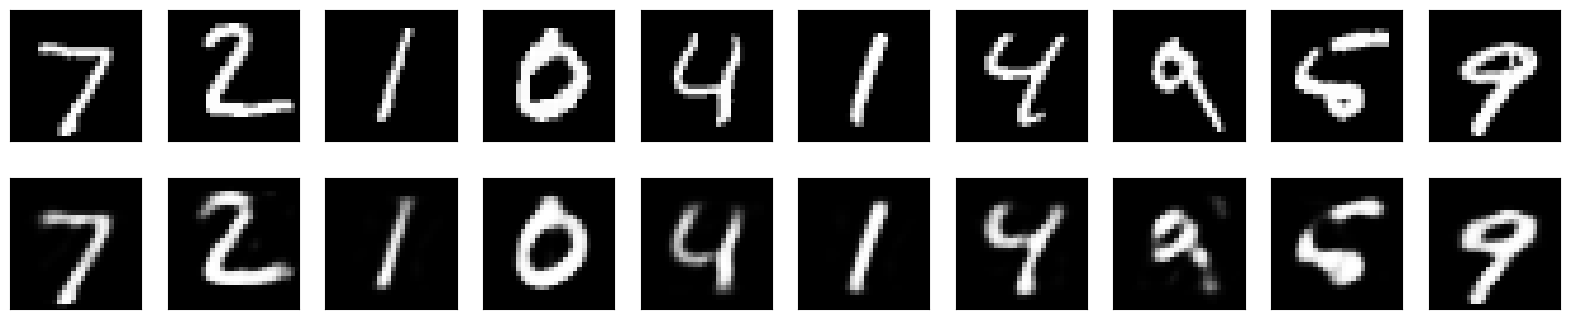

In [11]:
# Plotting original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_sparse[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()